# EXPLORATORY DATA ANALYSIS (EDA) OF HISTORICAL BITCOIN DATA
### Data Science using Python

###### Ivana J. Mc Donald

2023/2024 Data Analyst Project

**************************************************************************************************
**************************************************************************************************

# 1. Import Modules & Libraries

In [68]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
from scipy import stats

**************************************************************************************************
**************************************************************************************************

# 2. Gather Historical Bitcoin Price Data

## 2.1 Gather Historical Bitcoin Price Data from yfinance

Define the ticker symbol for Bitcoin

In [69]:
ticker_symbol = "BTC-USD"

Define the period for which we want historical data

In [70]:
period = "1y"

Fetch historical data for Bitcoin

In [71]:
btc_data = yf.download(ticker_symbol, period=period)

[*********************100%%**********************]  1 of 1 completed


Fetch historical data for Bitcoin

In [72]:
btc_data_df = yf.download(ticker_symbol, period=period)

[*********************100%%**********************]  1 of 1 completed


Display the first few rows of the data

In [73]:
btc_data_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-13,16799.722656,16920.765625,16320.634766,16353.365234,16353.365234,27209183682
2022-11-14,16352.028320,17109.324219,15872.941406,16618.199219,16618.199219,49630243054
2022-11-15,16617.484375,17051.962891,16542.550781,16884.613281,16884.613281,36599436183
2022-11-16,16884.341797,16960.294922,16430.111328,16669.439453,16669.439453,33925512989
2022-11-17,16670.425781,16726.439453,16460.683594,16687.517578,16687.517578,27868914022
...,...,...,...,...,...,...
2023-11-09,35633.632812,37926.257812,35592.101562,36693.125000,36693.125000,37762672382
2023-11-10,36702.250000,37493.800781,36362.753906,37313.968750,37313.968750,22711265155
2023-11-11,37310.070312,37407.093750,36773.667969,37138.050781,37138.050781,13924272142


Check for Missing Values

In [74]:
btc_data_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Date Column Cleaning

In [75]:
btc_data_df.reset_index(inplace=True)
btc_data_df['Date'] = pd.to_datetime(btc_data_df['Date'])

columns = list(btc_data_df.columns)
columns.insert(0, columns.pop(columns.index('Date')))

btc_data_df = btc_data_df[columns]

In [76]:
btc_data_df = btc_data_df.round(3)

In [77]:
btc_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-13,16799.723,16920.766,16320.635,16353.365,16353.365,27209183682
1,2022-11-14,16352.028,17109.324,15872.941,16618.199,16618.199,49630243054
2,2022-11-15,16617.484,17051.963,16542.551,16884.613,16884.613,36599436183
3,2022-11-16,16884.342,16960.295,16430.111,16669.439,16669.439,33925512989
4,2022-11-17,16670.426,16726.439,16460.684,16687.518,16687.518,27868914022
...,...,...,...,...,...,...,...
361,2023-11-09,35633.633,37926.258,35592.102,36693.125,36693.125,37762672382
362,2023-11-10,36702.250,37493.801,36362.754,37313.969,37313.969,22711265155
363,2023-11-11,37310.070,37407.094,36773.668,37138.051,37138.051,13924272142
364,2023-11-12,37133.992,37227.691,36779.117,37054.520,37054.520,11545715999


Check Data Types

In [78]:
btc_data_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

**************************************************************************************************
**************************************************************************************************

# 3. Analysis

## 3.1 Statistical Summary

In [79]:
stat_summary_df = btc_data_df.describe()

In [80]:
stat_summary_df = stat_summary_df.round(3)

In [81]:
stat_summary_df

,Open,High,Low,Close,Adj Close,Volume
count,366.000,366.000,366.000,366.000,366.000,3.660000e+02
mean,25644.796,26050.698,25309.694,25700.066,25700.066,1.815754e+10
std,4984.762,5084.180,4916.128,4999.302,4999.302,8.628182e+09
min,15782.301,16253.048,15599.047,15787.284,15787.284,5.331173e+09
25%,22933.862,23248.396,22654.377,22943.465,22943.465,1.201491e+10
50%,26816.164,27151.958,26484.712,26826.091,26826.091,1.587563e+10
75%,29067.467,29428.552,28688.004,29132.492,29132.492,2.251400e+10
max,37310.070,37926.258,36847.586,37313.969,37313.969,5.462223e+10


**************************************************************************************************

## 3.2 Time Series Analysis

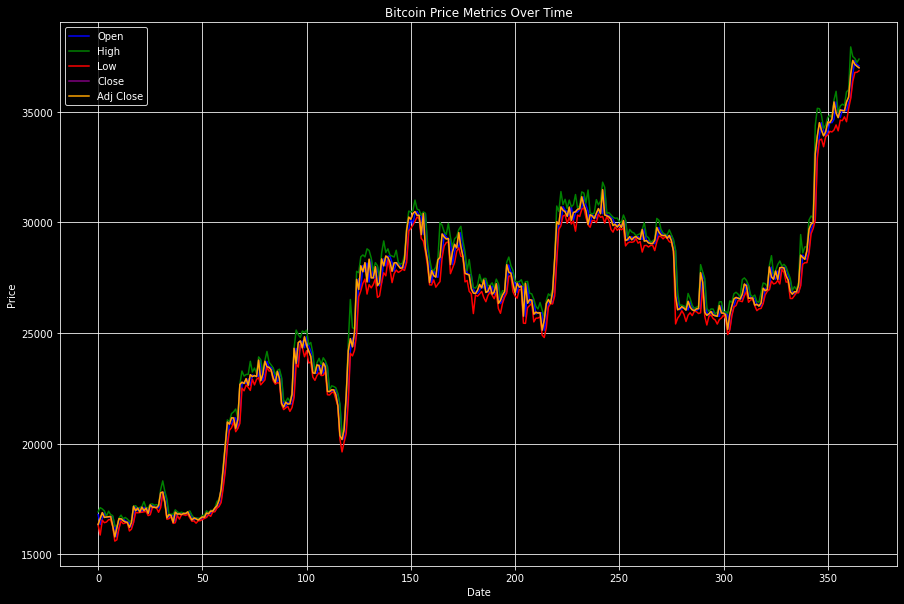

In [82]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 10))

plt.plot(btc_data_df['Open'], label='Open', color='blue')
plt.plot(btc_data_df['High'], label='High', color='green')
plt.plot(btc_data_df['Low'], label='Low', color='red')
plt.plot(btc_data_df['Close'], label='Close', color='purple')
plt.plot(btc_data_df['Adj Close'], label='Adj Close', color='orange')

plt.title('Bitcoin Price Metrics Over Time', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Price', color='white')
plt.legend(edgecolor='white')
plt.grid(True)

plt.tick_params(colors='white')

plt.show()

**************************************************************************************************

## 3.3 Volume Analysis

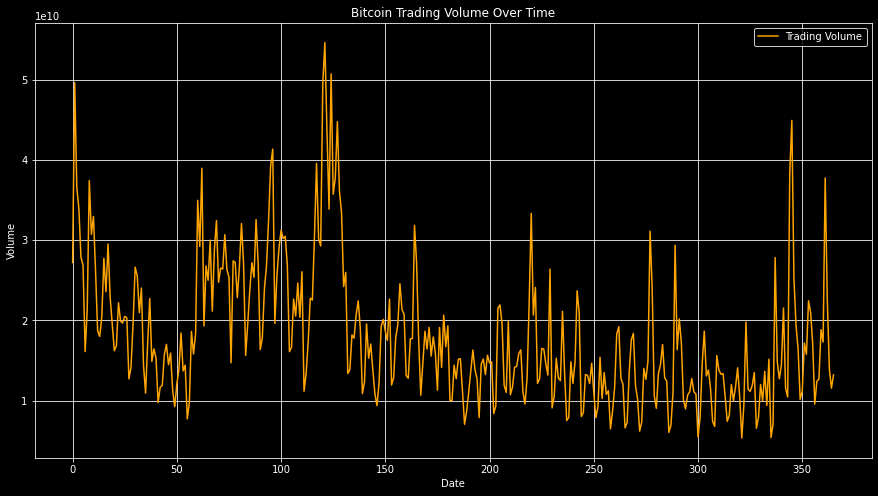

In [83]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 8))

plt.plot(btc_data_df['Volume'], label='Trading Volume', color='orange')

plt.title('Bitcoin Trading Volume Over Time', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Volume', color='white')
plt.legend(edgecolor='white')
plt.grid(True)

plt.tick_params(colors='white')

plt.show()

**************************************************************************************************

## 3.4 Distribution Analysis

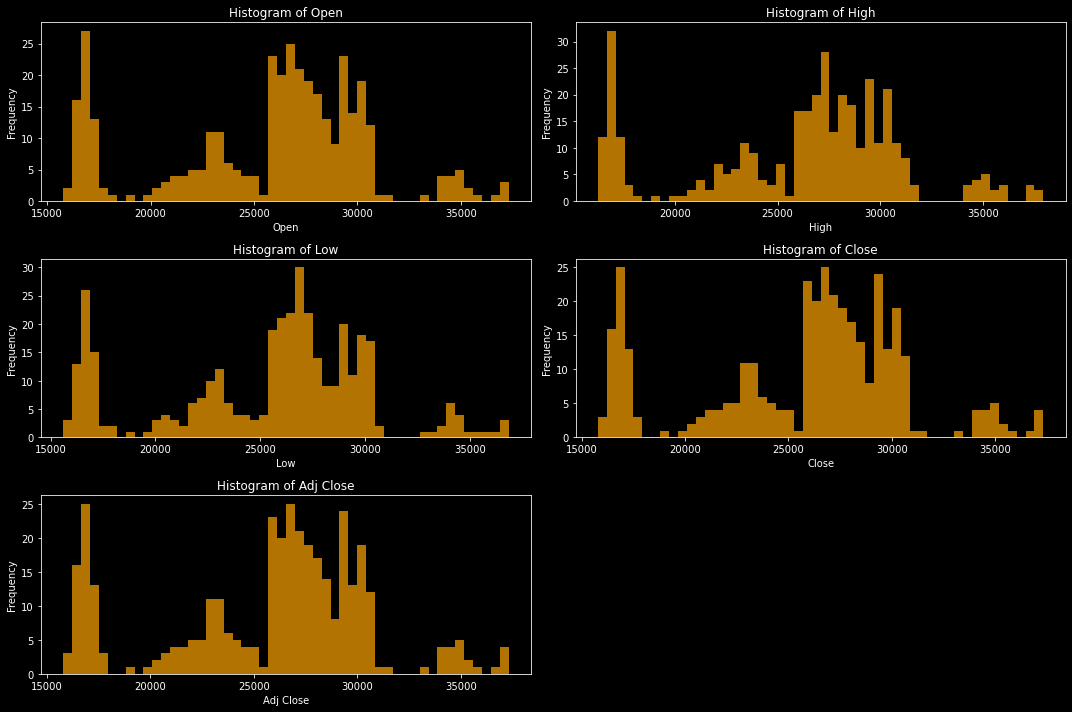

In [84]:
metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close']

plt.style.use('dark_background')
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots
    plt.hist(btc_data_df[metric], bins=50, color='orange', alpha=0.7)
    plt.title(f'Histogram of {metric}', color='white')
    plt.xlabel(metric, color='white')
    plt.ylabel('Frequency', color='white')


plt.tick_params(colors='white')
plt.tight_layout()
plt.show()

**************************************************************************************************

## 3.5 Correlation Analysis

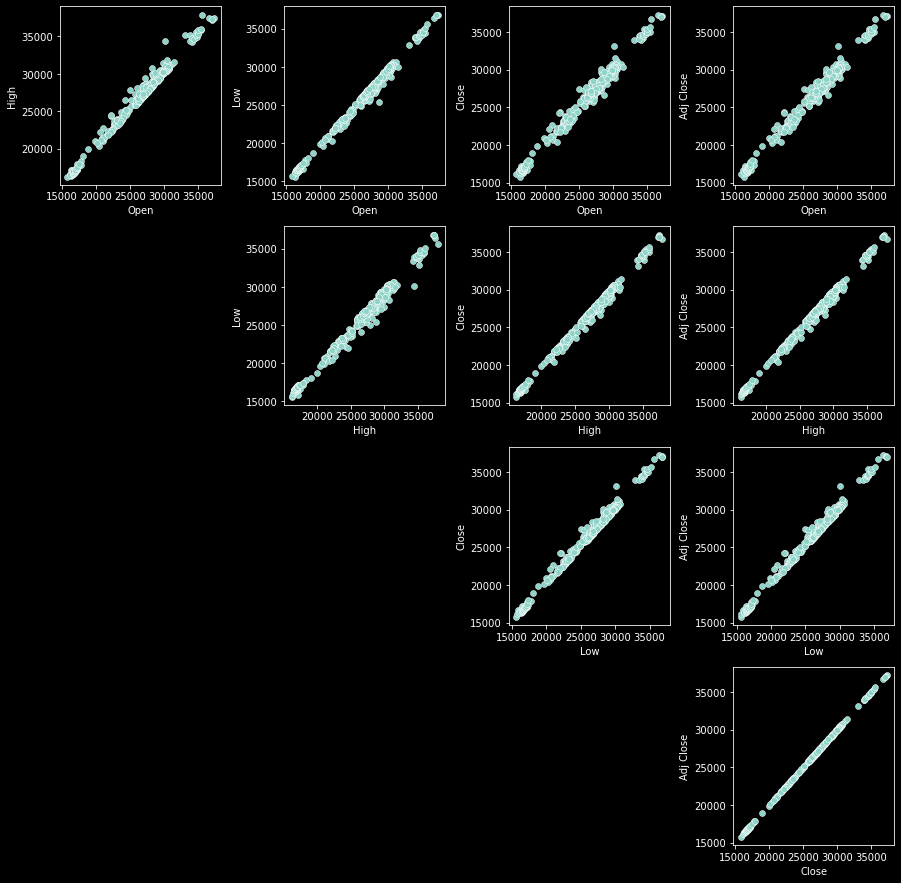

In [85]:
metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close']

plt.style.use('dark_background')
plt.figure(figsize=(15, 15))

for i, metric1 in enumerate(metrics):
    for j, metric2 in enumerate(metrics):
        if i < j:
            plt.subplot(len(metrics), len(metrics), i * len(metrics) + j + 1)
            sns.scatterplot(x=btc_data_df[metric1], y=btc_data_df[metric2])
            plt.xlabel(metric1, color='white')
            plt.ylabel(metric2, color='white')

plt.tight_layout()
plt.show()

In [86]:
correlation_matrix = btc_data_df[metrics].corr()
correlation_matrix_df = correlation_matrix
correlation_matrix_df

,Open,High,Low,Close,Adj Close
Open,1.000000,0.995135,0.997366,0.993833,0.993833
High,0.995135,1.000000,0.994532,0.997820,0.997820
Low,0.997366,0.994532,1.000000,0.996705,0.996705
Close,0.993833,0.997820,0.996705,1.000000,1.000000
Adj Close,0.993833,0.997820,0.996705,1.000000,1.000000


**************************************************************************************************

## 3.6 Detecting Anomalies

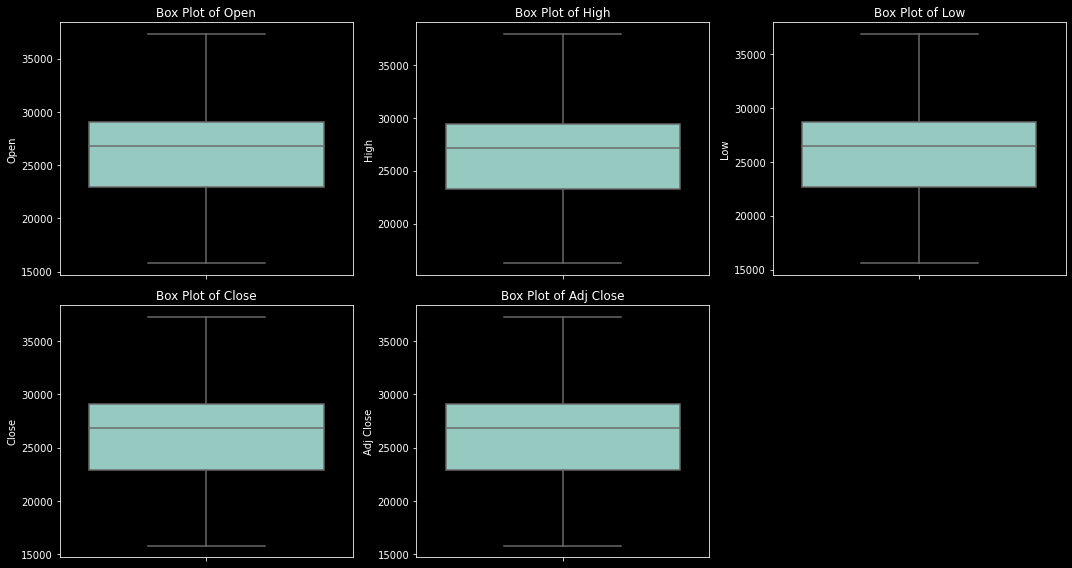

In [87]:
metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close']

plt.style.use('dark_background')
plt.figure(figsize=(15, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=btc_data_df[metric])
    plt.title(f'Box Plot of {metric}', color='white')

plt.tick_params(colors='white')
plt.tight_layout()
plt.show()

threshold = 3

for metric in metrics:
    btc_data_df[f'{metric}_z'] = stats.zscore(btc_data_df[metric])

In [88]:
for metric in metrics:
    outliers = btc_data_df[(btc_data_df[f'{metric}_z'] > threshold) | (btc_data_df[f'{metric}_z'] < -threshold)]
    print(f"Outliers in {metric}:")
    print(outliers[[metric, f'{metric}_z']], '\n')

Outliers in Open:
Empty DataFrame
Columns: [Open, Open_z]
Index: [] 

Outliers in High:
Empty DataFrame
Columns: [High, High_z]
Index: [] 

Outliers in Low:
Empty DataFrame
Columns: [Low, Low_z]
Index: [] 

Outliers in Close:
Empty DataFrame
Columns: [Close, Close_z]
Index: [] 

Outliers in Adj Close:
Empty DataFrame
Columns: [Adj Close, Adj Close_z]
Index: [] 



**************************************************************************************************
**************************************************************************************************